In [66]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
from main.data_tools.extract_ntuples import get_pd, get_np

In [158]:
file_name = '/home/jykim/ntuple_100000.root'
# file_name = '/home/jykim/ntuple_10e5.root'

base_filter = 'daughter__bo1__cmcharge__bc==1'
signal_variables = ['__event__','daughter__bo1__cmcharge__bc',"isSignal","mcErrors"]
tree = 'Dstar'

In [159]:
pd_df_test = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=signal_variables)

In [160]:
pd_df_test

,__event__,daughter__bo1__cmcharge__bc,isSignal,mcErrors
0,1,1.0,1.0,0.0
1,3,1.0,1.0,0.0
2,4,1.0,1.0,0.0
3,5,1.0,1.0,0.0
4,6,1.0,1.0,0.0
...,...,...,...,...
52936,99993,1.0,1.0,0.0
52937,99995,1.0,1.0,0.0
52938,99996,1.0,1.0,0.0
52939,99998,1.0,1.0,0.0


In [161]:
pd_df_test['mcErrors'].unique()

array([0.])

In [162]:
file_name = '/home/jykim/ntuple_100000.root'
# file_name = '/home/jykim/ntuple_10e5.root'

base_filter = 'daughter__bo1__cmcharge__bc==-1'
signal_variables = ['__event__','daughter__bo1__cmcharge__bc',"isSignal","mcErrors"]
tree = 'Dstar'

In [163]:
pd_df_test_bar = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=signal_variables)

In [164]:
pd_df_test_bar

,__event__,daughter__bo1__cmcharge__bc,isSignal,mcErrors
0,2,-1.0,1.0,0.0
1,3,-1.0,1.0,0.0
2,7,-1.0,1.0,0.0
3,8,-1.0,1.0,0.0
4,11,-1.0,1.0,0.0
...,...,...,...,...
52946,99992,-1.0,1.0,0.0
52947,99994,-1.0,1.0,0.0
52948,99997,-1.0,1.0,0.0
52949,99998,-1.0,1.0,0.0


In [165]:
pd_df_test_bar['mcErrors'].unique()

array([0.])

In [166]:
intersection_dataframe = pd.merge(pd_df_test, pd_df_test_bar, on='__event__')


In [167]:
intersection_dataframe

,__event__,daughter__bo1__cmcharge__bc_x,isSignal_x,mcErrors_x,daughter__bo1__cmcharge__bc_y,isSignal_y,mcErrors_y
0,3,1.0,1.0,0.0,-1.0,1.0,0.0
1,8,1.0,1.0,0.0,-1.0,1.0,0.0
2,38,1.0,1.0,0.0,-1.0,1.0,0.0
3,39,1.0,1.0,0.0,-1.0,1.0,0.0
4,43,1.0,1.0,0.0,-1.0,1.0,0.0
...,...,...,...,...,...,...,...
5899,99913,1.0,1.0,0.0,-1.0,1.0,0.0
5900,99927,1.0,1.0,0.0,-1.0,1.0,0.0
5901,99949,1.0,1.0,0.0,-1.0,1.0,0.0
5902,99981,1.0,1.0,0.0,-1.0,1.0,0.0


In [168]:
intersection_dataframe_D0 = pd.merge(pd_df_test, intersection_dataframe, on='__event__')
intersection_dataframe_D0bar = pd.merge(pd_df_test_bar, intersection_dataframe, on='__event__')


In [169]:
intersection_dataframe_D0

,__event__,daughter__bo1__cmcharge__bc,isSignal,mcErrors,daughter__bo1__cmcharge__bc_x,isSignal_x,mcErrors_x,daughter__bo1__cmcharge__bc_y,isSignal_y,mcErrors_y
0,3,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
1,8,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
2,38,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
3,39,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
4,43,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5899,99913,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
5900,99927,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
5901,99949,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
5902,99981,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0


In [170]:
len(intersection_dataframe_D0['__event__'].unique())

5904

In [171]:
intersection_dataframe_D0bar

,__event__,daughter__bo1__cmcharge__bc,isSignal,mcErrors,daughter__bo1__cmcharge__bc_x,isSignal_x,mcErrors_x,daughter__bo1__cmcharge__bc_y,isSignal_y,mcErrors_y
0,3,-1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
1,8,-1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
2,38,-1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
3,39,-1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
4,43,-1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5899,99913,-1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
5900,99927,-1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
5901,99949,-1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0
5902,99981,-1.0,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,0.0


In [172]:
len(intersection_dataframe_D0bar['__event__'].unique())

5904

In [191]:
if 385 in intersection_dataframe_D0bar['__event__'].unique():
    print(True)
    

True


In [173]:
file_name = '/home/jykim/ntuple_100000.root'
# file_name = '/home/jykim/ntuple_10e5.root'

# base_filter = 'daughter__bo1__cmcharge__bc!=-1 && daughter__bo1__cmcharge__bc!=1'
base_filter = '__event__>0'
signal_variables = ['__event__','daughter__bo1__cmcharge__bc',"isSignal","mcErrors"]
tree = 'Dstar'

In [174]:
pd_df_testing = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=signal_variables)

In [175]:
pd_df_testing

,__event__,daughter__bo1__cmcharge__bc,isSignal,mcErrors
0,1,1.0,1.0,0.0
1,2,-1.0,1.0,0.0
2,3,1.0,1.0,0.0
3,3,-1.0,1.0,0.0
4,4,1.0,1.0,0.0
...,...,...,...,...
105887,99997,-1.0,1.0,0.0
105888,99998,1.0,1.0,0.0
105889,99998,-1.0,1.0,0.0
105890,99999,-1.0,1.0,0.0


In [176]:
len(pd_df_testing['__event__'].unique())

99988

In [177]:
pd_df_testing['__event__'].unique()

array([     1,      2,      3, ...,  99998,  99999, 100000], dtype=uint32)

In [178]:
# intersection_dataframe = pd.merge(pd_df_test, pd_df_test_bar, on='__event__')


In [179]:
# Creating a Pandas DataFrame with an array from 1 to 100000
df = pd.DataFrame({'__event__': range(1, 100001)})

# Printing the first few rows of the DataFrame
print(df.head())

   __event__
0          1
1          2
2          3
3          4
4          5


In [180]:
no_event = pd.merge(pd_df_testing, df, how='outer', indicator=True)

In [181]:
no_event

,__event__,daughter__bo1__cmcharge__bc,isSignal,mcErrors,_merge
0,1,1.0,1.0,0.0,both
1,2,-1.0,1.0,0.0,both
2,3,1.0,1.0,0.0,both
3,3,-1.0,1.0,0.0,both
4,4,1.0,1.0,0.0,both
...,...,...,...,...,...
105899,46099,NaN,NaN,NaN,right_only
105900,54879,NaN,NaN,NaN,right_only
105901,68058,NaN,NaN,NaN,right_only
105902,74747,NaN,NaN,NaN,right_only


In [182]:
no_event2 = no_event[no_event['_merge']=='right_only']

In [183]:
no_event2

,__event__,daughter__bo1__cmcharge__bc,isSignal,mcErrors,_merge
105892,6927,NaN,NaN,NaN,right_only
105893,10857,NaN,NaN,NaN,right_only
105894,11583,NaN,NaN,NaN,right_only
105895,16065,NaN,NaN,NaN,right_only
105896,16926,NaN,NaN,NaN,right_only
105897,26337,NaN,NaN,NaN,right_only
105898,26940,NaN,NaN,NaN,right_only
105899,46099,NaN,NaN,NaN,right_only
105900,54879,NaN,NaN,NaN,right_only
105901,68058,NaN,NaN,NaN,right_only


In [184]:
len(no_event2)

12

In [185]:
both_Dstars = no_event[no_event['_merge']=='both']

In [186]:
both_Dstars

,__event__,daughter__bo1__cmcharge__bc,isSignal,mcErrors,_merge
0,1,1.0,1.0,0.0,both
1,2,-1.0,1.0,0.0,both
2,3,1.0,1.0,0.0,both
3,3,-1.0,1.0,0.0,both
4,4,1.0,1.0,0.0,both
...,...,...,...,...,...
105887,99997,-1.0,1.0,0.0,both
105888,99998,1.0,1.0,0.0,both
105889,99998,-1.0,1.0,0.0,both
105890,99999,-1.0,1.0,0.0,both


56


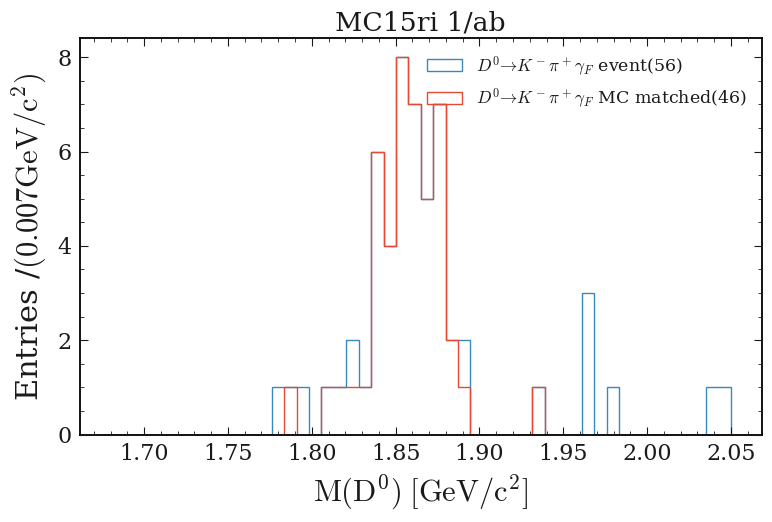

In [72]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.68,2.05,51)

xm = np.linspace(*xrange)

df = pd_df_test
df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)

plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ event(' + str(N_df) +')');
plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
plt.savefig(file1_name)
print(len(df))

In [67]:
file_name = '/home/jykim/workspace/ssd_T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_sigbkg/topo_FSR/resultfile/result_antiKstar/standard.root'
base_filter = 'D0_M>1.68 && D0_M<2.05 && dM_pi0_75MeV>0.022 && iCascDcyBrP_Dst_0==54 && (antiKstar_Km_genMotherID == antiKstar_Pip_genMotherID && antiKstar_Km_genMotherID == gamma_genMotherID && antiKstar_Km_genMotherPDG == 421)'
signal_variables = ['D0_M','Dstarp_CMS_p',"Dstarp_isSignal"]
tree = 'antiKstar'

In [68]:
pd_df_test2 = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=signal_variables)

56


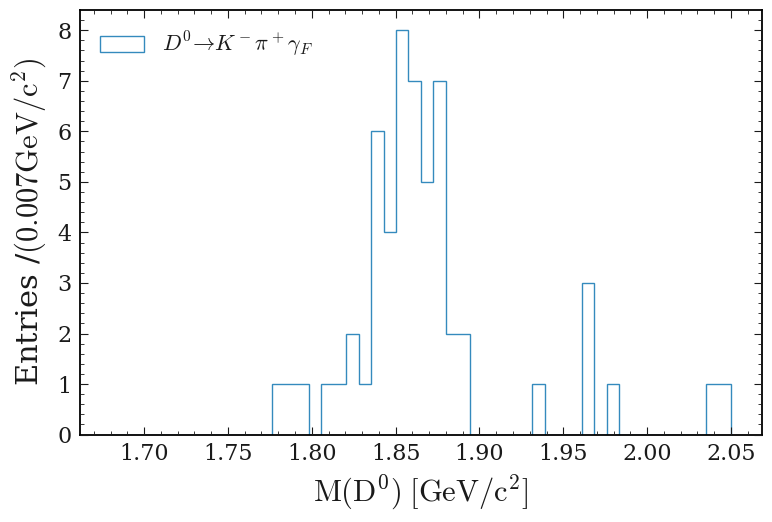

In [69]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.68,2.05,51)

xm = np.linspace(*xrange)

df = pd_df_test
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$');

plt.legend(loc="upper left")
# ax.set_title(r'1M signal MC' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()

print(len(df))